1. **Desviación estándar dentro del RIC:**
Esto podría indicar que la mayor parte de la variabilidad en los datos se encuentra dentro de la mitad central de la distribución.

2. **Desviación estándar fuera del RIC:**
Esto podría indicar que hay valores extremos o una mayor variabilidad en general, más allá de la mitad central de los datos.

3. **Desviación estándar cruzando el RIC:**
Esto podría indicar una distribución asimétrica o una presencia significativa de valores atípicos.

In [ ]:
#Hacer otro dataframe y luego unirlo ene se orden.

# df_pregunta1.sort_values(by=['mnth'],inplace=True)
# df_pregunta1.tail(2).sort_values(by='season',ascending=False, inplace= True)

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

bar_width = 0.30
x = df_estaciones

golden = ax.bar(x-bar_width, df_best['Gold'], bar_width, label='Oro', color='gold')
silver = ax.bar(x, df_best['Silver'], bar_width, label='Plata', color='silver')

ax.set_xticks(x);
ax.set_xticklabels(df_best.index, rotation=90);
ax.legend();

# Etiquetas en las barras
ax.bar_label(golden);
ax.bar_label(silver);
ax.bar_label(bronze);

ax.spines['right'].set_visible(False) # oculta el borde derecho
ax.spines['top'].set_visible(False) # oculta el borde superior

fig.tight_layout()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Supongamos que df2011 es tu DataFrame

# # Agrupa por temporada y suma las columnas 'casual' y 'registered'
# grouped_data = df2011.groupby('season')[['casual','registered']].agg({'casual':'sum','registered':'sum'}).reset_index()

# # Crea el gráfico de barras
# fig, ax = plt.subplots(2)
# ax[0].bar(x='season', y='casual', data=grouped_data, color='blue', label='Casual')
# ax[1].bar(x='season', y='registered', data=grouped_data, color='orange', label='Registered')

# # Agrega etiquetas y leyenda
# plt.xlabel('Season')
# plt.ylabel('Count')
# plt.title('Casual vs Registered by Season')
# plt.legend()


In [ ]:
#La documentación es erronea. el 1 en season representa el invierno.

df2011_season1_inv = df2011.query('season == 1') 
df2011_season1_inv['mnth'].unique()

In [ ]:
sns.boxplot(data=df2011_season1_inv,x='mnth',y='Temperatura')

In [21]:
import pandas as pd
import numpy as np

minidataframe = pd.DataFrame({
        'categorico': ['martina','martina','martina','pepe','sebastian','sebastian'],
        'numerico_discreto' : [15,30,25,34,56,90],
        'numerico_continuo': [1.65,1.80,1.70,1.60,1.78,2.00]      
    })

minidataframe.numerico_continuo.dtypes == 'float64'

True

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def analisis_univariante(df):
    
     for columna in df.columns:
        plt.figure(figsize=(8, 5))  # Tamaño de la figura
        
        if df[columna].dtypes == 'float64':
            
            # Calcular medidas estadísticas
            media = df[columna].mean()
            mediana = df[columna].median()
            moda = df[columna].mode().iloc[0] 
            std = df[columna].std()
            percentilbajo, percentilalto = df[columna].quantile([0.25,0.75])
            
            sns.histplot(df[columna])
            
            # # Marcar la media con una línea vertical y una anotación
            plt.axvline(media, color='red', linestyle='dashdot', linewidth=2, label=f'Media: {media:.2f}')
            # plt.text(media, 0.02, f'Media: {media:.2f}', color='red', ha='center', va='bottom')

            # # Marcar la mediana con una línea vertical y una anotación
            plt.axvline(mediana, color='green', linestyle='dashdot', linewidth=2, label=f'Mediana: {mediana:.2f}')
            # plt.text(mediana, 0.02, f'Mediana: {mediana:.2f}', color='green', ha='center', va='bottom') SE VE HORRIBLE

            # # Marcar la moda con una línea vertical y una anotación
            plt.axvline(moda, color='violet', linestyle='solid', linewidth=2, label=f'Moda: {moda:.2f}')
            # plt.text(moda, 0.02, f'Moda: {moda:.2f}', color='blue', ha='center', va='bottom')

            plt.axvline(media + std, color='black', linestyle='dotted', linewidth=2, label=f'std: {std:.2f}')
            plt.axvline(media - std, color='black', linestyle='dotted', linewidth=2, label=f'std: {std:.2f}')
            
            plt.axvline(percentilbajo, color='yellow', linestyle='solid', linewidth=2, label=f'Q-25: {percentilbajo:.2f}')
            
            plt.axvline(percentilalto, color='yellow', linestyle='solid', linewidth=2, label=f'Q-75: {percentilalto:.2f}')
            
            plt.legend()
          

            print('****' * 30)
            print(f'Estadística Descriptiva\nMedia: {media} - Mediana: {mediana} - Moda: {moda} - Std: {round(std,3)} - Q1: {round(percentilbajo,3)} - Q3: {round(percentilalto,3)} ')
            print('****' * 30)
          
        elif df[columna].dtypes == 'int64':
            
            media = df[columna].mean()
            asimetria = df[columna].skew()
            curtosis = df[columna].kurt()
            
            sns.histplot(data=df[columna], kde=True)
            
            # plt.axvline(media, color='red', linestyle='dashdot', linewidth=2, label=f'Media: {media:.2f}')
            # plt.axvline(media + asimetria, color='yellow', linestyle='solid', linewidth=2, label=f'Asimetría: {asimetria:.2f}')
            # plt.axvline(media + curtosis, color='yellow', linestyle='solid', linewidth=2, label=f'curtosis: {curtosis:.2f}')
            
            plt.legend()
            
            print('****' * 20)
            print(f'Estadística Descriptiva\nCurtosis: {round(curtosis,3)} - Asimetría: {round(asimetria,3)} - Cantidad: {df[columna].describe().iloc[0]} - Media: {round(df[columna].describe().iloc[1],3)} - Std: {round(df[columna].describe().iloc[2],3)}\nIQR:\n{df[columna].describe().iloc[3:]} ')
            print('****' * 20)     
                  
        elif df[columna].dtypes == object:
            sns.histplot(df[columna])
            
            print('****' * 20)
            print(f'Estadística Descriptiva\n{df[columna].describe()} ')
            print('****' * 20)
            
        # Configuraciones generales del gráfico
        plt.title(f'Análisis Univariante de {columna}')
        plt.xlabel(columna)
        plt.ylabel('count')
        plt.show()

# todo esto a un archivo.py 

********************************************************************************
Estadística Descriptiva
count           6
unique          3
top       martina
freq            3
Name: categorico, dtype: object 
********************************************************************************


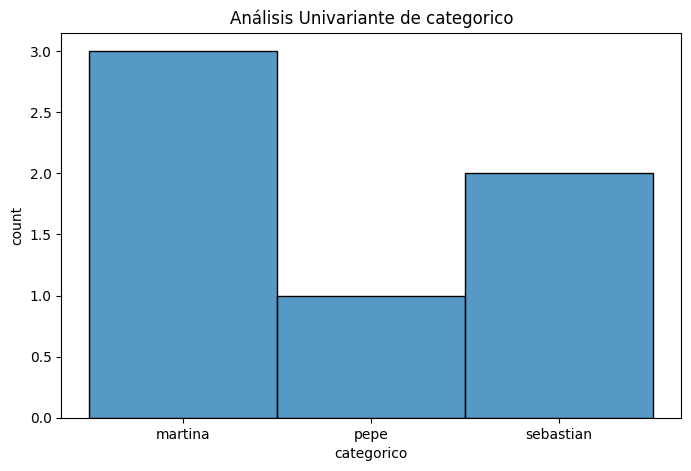

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


********************************************************************************
Estadística Descriptiva
Curtosis: 1.448 - Asimetría: 1.331 - Cantidad: 6.0 - Media: 41.667 - Std: 27.296
IQR:
min    15.00
25%    26.25
50%    32.00
75%    50.50
max    90.00
Name: numerico_discreto, dtype: float64 
********************************************************************************


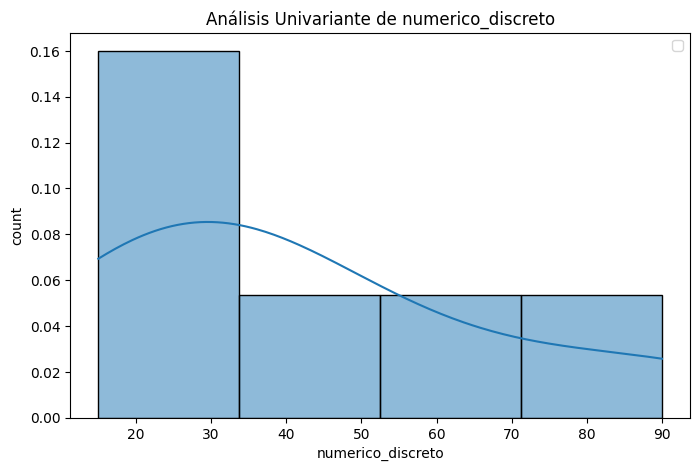

************************************************************************************************************************
Estadística Descriptiva
Media: 1.755 - Mediana: 1.74 - Moda: 1.6 - Std: 0.142 - Q1: 1.662 - Q3: 1.795 
************************************************************************************************************************


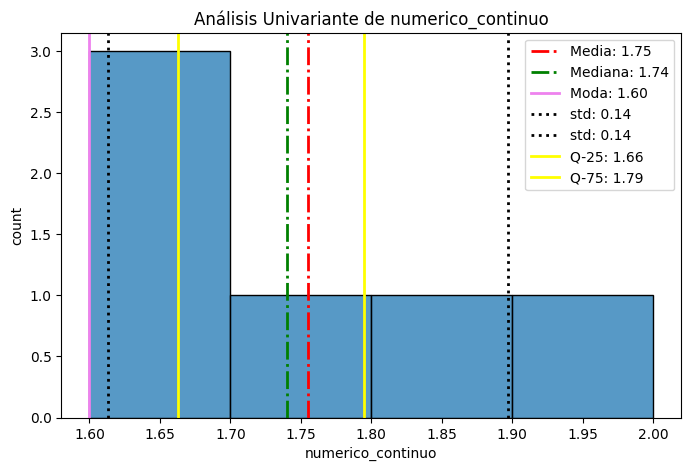

In [36]:
analisis_univariante(minidataframe)

******
******


In [ ]:
sns.histplot(data=df2011['casual'], stat='frequency', kde=True) 

In [ ]:
df2011.temperature.describe()

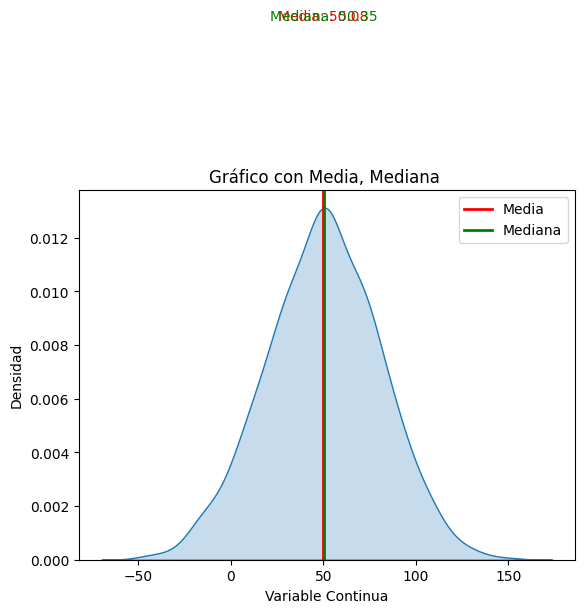

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
datos = np.random.randn(1000) * 30 + 50  # Datos de una distribución normal

# Crear el gráfico de densidad con Seaborn
sns.kdeplot(datos, fill=True)

# Calcular la media, mediana y moda
media = np.mean(datos)
mediana = np.median(datos) # La función mode devuelve una Serie, convertimos a float

# Marcar la media con una línea vertical y una anotación
plt.axvline(media, color='red',  linewidth=2, label='Media')
plt.text(media, 0.02, f'Media: {media:.2f}', color='red', ha='center', va='bottom')

# Marcar la mediana con una línea vertical y una anotación
plt.axvline(mediana, color='green',  linewidth=2, label='Mediana')
plt.text(mediana, 0.02, f'Mediana: {mediana:.2f}', color='green', ha='center', va='bottom')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.title('Gráfico con Media, Mediana ')
plt.xlabel('Variable Continua')
plt.ylabel('Densidad')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
def analisis_univariante(df):
    
     for columna in df.columns:
        plt.figure(figsize=(8, 5))  # Tamaño de la figura
        
        if df[columna].dtype in [int, float]:
            
            # Calcular medidas estadísticas
            media = df[columna].mean()
            mediana = df[columna].median()
            moda = df[columna].mode().iloc[0]  # -> no me da
            std = df[columna].std()
            percentilbajo, percentilalto = df[columna].quantile([0.25,0.75])
            
            # Crear el gráfico de densidad con Seaborn
            sns.histplot(df[columna])
            # print(f'media de {i}: {media}')
            
            # # Marcar la media con una línea vertical y una anotación
            plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
            # plt.text(media, 0.02, f'Media: {media:.2f}', color='red', ha='center', va='bottom')

            # # Marcar la mediana con una línea vertical y una anotación
            plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
            # plt.text(mediana, 0.02, f'Mediana: {mediana:.2f}', color='green', ha='center', va='bottom')

            # # Marcar la moda con una línea vertical y una anotación
            plt.axvline(moda, color='orange', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
            # plt.text(moda, 0.02, f'Moda: {moda:.2f}', color='blue', ha='center', va='bottom')

            plt.axvline(media + std, color='black', linestyle='dashed', linewidth=2, label=f'std: {std:.2f}')
            plt.axvline(media - std, color='black', linestyle='dashed', linewidth=2, label=f'std: {std:.2f}')
            
            plt.axvline(percentilbajo, color='yellow', linestyle='dashed', linewidth=2, label=f'Q-25: {percentilbajo:.2f}')
            
            plt.axvline(percentilalto, color='yellow', linestyle='dashed', linewidth=2, label=f'Q-75: {percentilalto:.2f}')
            
            plt.legend()
            
        else:
            sns.histplot(df[columna])
            
        # Configuraciones generales del gráfico
        plt.title(f'Análisis Univariante de {columna}')
        plt.xlabel(columna)
        plt.ylabel('count')
        plt.show()


Densidad (en el contexto de KDE - Kernel Density Estimation):

La densidad se refiere a la cantidad de "algo" en una unidad de espacio. En el análisis de datos, la densidad se utiliza para describir cómo se distribuyen los valores de una variable continua a lo largo de su rango.

En el contexto de KDE (Kernel Density Estimation), se trata de una técnica para estimar la función de densidad de probabilidad de una variable continua. En lugar de mostrar puntos de datos individuales, KDE suaviza la distribución alrededor de esos puntos, proporcionando una representación continua de la densidad de probabilidad.

Ejemplo sencillo:

Supongamos que tienes un conjunto de datos que representa las alturas de un grupo de personas. Cada punto en tu conjunto de datos sería la altura de una persona en particular.

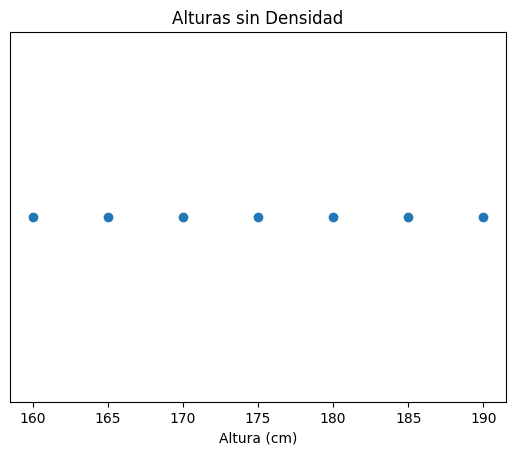

In [1]:
import matplotlib.pyplot as plt

alturas = [160, 165, 170, 175, 180, 185, 190]
plt.scatter(alturas, [1]*len(alturas))  # Usamos 1 como altura para todos los puntos
plt.title('Alturas sin Densidad')
plt.xlabel('Altura (cm)')
plt.yticks([])  # Eliminamos el eje y para claridad
plt.show()


C:\Users\Sol\AppData\Local\Temp\ipykernel_2736\597352984.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alturas, shade=True)


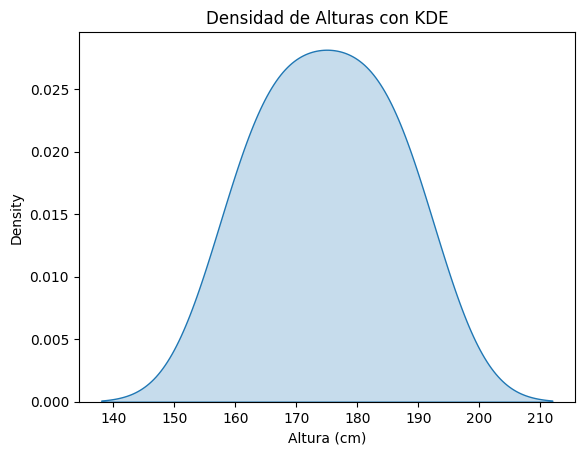

In [2]:
import seaborn as sns

sns.kdeplot(alturas, shade=True)
plt.title('Densidad de Alturas con KDE')
plt.xlabel('Altura (cm)')
plt.show()


¿Qué diferencia hay entre la temperatura y la sensación térmica?
Dicho de una manera sencilla, la temperatura es el grado de calor o de frío oficial en la atmósfera, mientras que la sensación térmica es el grado de calor o de frío que los cuerpos experimentarán en dicha atmósfera debido a factores meteorológicos determinados.

![imagen_logo](descarga.png)

In [ ]:
df2011.query('dteday == "2011-01-27"') #Como podemos observar en este día solo hubieron 8 registros. 

In [ ]:
# Como tengo que analizar el año completo voy a realizar métricas por mes y estación del año, para luego realizar una global.

In [ ]:
# df2011[df2011.dteday.isna()].shape[0]


In [ ]:
# df2011.select_dtypes(exclude=['object']).corr()

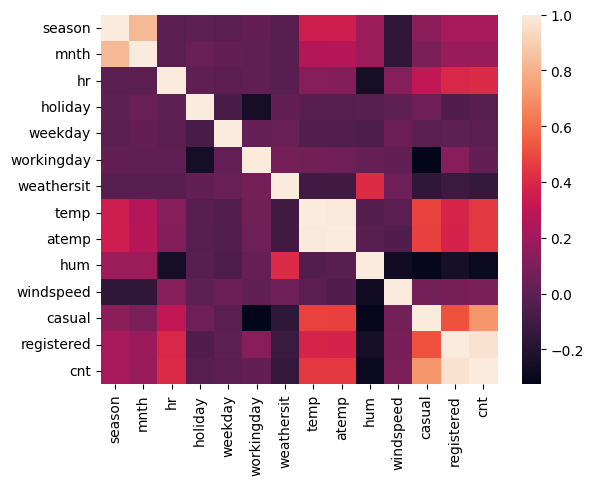

In [ ]:
# sns.heatmap(df2011.select_dtypes(exclude=['object']).corr())
# # df2011.drop(columns = df2011.describe(include='object')).corr()
# plt.show()

In [ ]:
#Los gardos Celsius se encuentran entre 0-100 y Farenheit entre 32-212


El Heatmap, nos muestra que hay un grado de correlación entre las variables **temp-atemp** and **casual-registered**

El Heatmap, nos muestra que hay un grado de correlación entre las variables **temp-atemp** and **casual-registered**

El Heatmap, nos muestra que hay un grado de correlación entre las variables **temp-atemp** and **casual-registered**